# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [5]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [8]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 total observations. However some of predictors are missing values.

#### Question 2. Create a summary table

In [13]:
#function
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'admit ~ (gre + gpa + prestige)', data = df_raw).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     13.69
Date:                Sat, 06 Jan 2018   Prob (F-statistic):           1.65e-08
Time:                        17:04:02   Log-Likelihood:                -239.99
No. Observations:                 397   AIC:                             488.0
Df Residuals:                     393   BIC:                             503.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1610      0.218     -0.737      0.462        -0.591     0.269
gre            0.0004      0.000      2.063      0.040      2.05e-05     0.001
gpa            0.1462      0.064      2.296      0.022         0.021     0.271
prestige      -0.1097      0.024     -4.606      0.000        -0.156    -0.063
==============================================================================
Omnibus:                      191.690   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.364
Skew:                           0.670   Prob(JB):                     7.02e-12
Kurtosis:                       1.855   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The is much more variance in GRE scores.

#### Question 4. Drop data points with missing data


In [16]:
df_not_missing = df_raw[df_raw.gre.notnull() & df_raw.gpa.notnull() & df_raw.prestige.notnull()]
df_not_missing.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Checked the count after the drop, compare against the df_raw dataframe.

#### Question 6. Create box plots for GRE and GPA

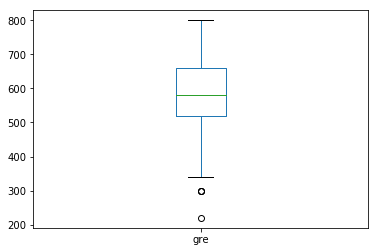

In [17]:
#boxplot 1
df_not_missing.gre.plot(kind = 'box')

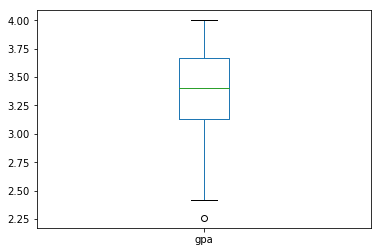

In [20]:
#boxplot 2
df_not_missing.gpa.plot(kind = 'box')

#### Question 7. What do this plots show?

Answer: They show the outliers, mean, median, mode, quartiles etc.

#### Question 8. Describe each distribution 

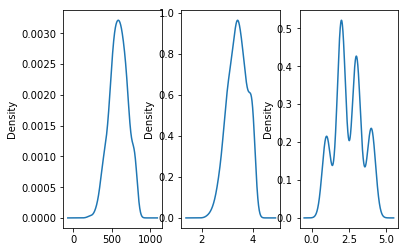

In [28]:
# plot the distribution of each variable 
fig, axs = plt.subplots(1, 3)
df_not_missing.gre.plot(kind = 'density', ax = axs[0])
df_not_missing.gpa.plot(kind = 'density', ax = axs[1])
df_not_missing.prestige.plot(kind = 'density', ax = axs[2])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, gre seems to be the only one with a relatively normal distribution.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes it needs correction. There are some outliers etc.

#### Question 11. Which of our variables are potentially colinear? 

In [29]:
# create a correlation matrix for the data
print df_not_missing.corr()

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000


#### Question 12. What did you find?

Answer: Low risk of colinearity as not high correlation among the predictors.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: All the steps above go into determining the association between gradschool admissions and prestige of undergraduate school.

#### Question 14. What is your hypothesis? 

Answer: All three predictors have a high association with determining the admittance of the candidate.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data